In [2]:
import numpy as np
from arc import *
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad
import scipy
from scipy.integrate import solve_ivp
from scipy.special import hyp1f1, hyperu
from scipy.special import gamma as gamma_f
from sympy.physics.wigner import clebsch_gordan, wigner_6j
from typing import Dict, Tuple, List
import mpmath as mp
import pandas as pd

In [33]:
cs = Cesium()
rb = Rubidium87()
h = 6.626e-34
e = 1.602e-19
a0 = 5.291e-11
hbar = h/2/np.pi
EH = 4.359744e-18
c = 299792458
me = 9.1093837e-31
epi0 = 8.854e-12
bohr_r = 5.291e-11

<h2>Calculate Error</h2>

In [73]:
sigma =  8.72E+02*1e-28
omega_photon = rb.getTransitionFrequency(n1=5, l1=0, j1=1/2, n2=50, l2=1, j2=3/2, s=0.5)*2*np.pi
print(c/(omega_photon/2/np.pi))
rabi = 10e6*2*np.pi
# sigma = 9.64e3*1e-28
d = rb.getDipoleMatrixElement(n1=5, l1=0, j1=1/2, mj1=1/2, n2=50, l2=1, j2=3/2, mj2=3/2,q=1, s=0.5)*bohr_r/hbar*e
print(d)
E = rabi/d
# print(sigma/d/d)
print(sigma/hbar/omega_photon*E**2/2*c*epi0*pr/rabi)
print(pr/2*c*epi0/hbar/omega_photon*sigma/d/d*rabi)

2.972485881197206e-07
155.20486140126616
1.6261705972436113e-06
1.6261705972436109e-06


In [52]:
sigma =  2.51E+04*1e-28
omega_photon = cs.getTransitionFrequency(n1=6, l1=0, j1=1/2, n2=20, l2=1, j2=3/2, s=0.5)*2*np.pi
# print(c/(omega_photon/2/np.pi))
rabi = 10e6*2*np.pi
# sigma = 9.64e3*1e-28
d = cs.getDipoleMatrixElement(n1=6, l1=0, j1=1/2, mj1=1/2, n2=20, l2=1, j2=3/2, mj2=3/2,q=1, s=0.5)*bohr_r/hbar*e
print(d)
E = rabi/d
# print(sigma/d/d)
print(sigma/hbar/omega_photon*E**2/2*c*epi0*pr/rabi)
print(pr/2*c*epi0/hbar/omega_photon*sigma/d/d*rabi)

3.2257623390465905e-07
-1006.1887847847762
1.2086139529573926e-06
1.2086139529573926e-06


In [40]:
pr = 3.6
#wavelength = 319 #nm
data = pd.read_csv('CsnS12.csv', index_col=0)
#omega_photon = c/wavelength/1e-9*np.pi*2
ns = np.arange(20,100,5)
for n in ns:
    sigma = data.loc[n]['sigma']*1e-28
    omega_photon = cs.getTransitionFrequency(n1=6, l1=0, j1=1/2, n2=n, l2=1, j2=3/2, s=0.5)*2*np.pi
    rabi = 10e6*2*np.pi
    # sigma = 9.64e3*1e-28
    d = cs.getDipoleMatrixElement(n1=6, l1=0, j1=1/2, mj1=1/2, n2=n, l2=1, j2=3/2, mj2=3/2,q=1, s=0.5)*bohr_r/hbar*e
    E = rabi/d
    # print(sigma/d/d)
    # print(sigma/hbar/omega_photon*E**2/2*c*epi0*pr/rabi)
    print(pr/2*c*epi0/hbar/omega_photon*sigma/d/d*rabi)

1.2086139529573926e-06
1.1333614110027951e-06
1.1815079740632077e-06
1.11227940719187e-06
1.2244053815407766e-06
1.1507702363964653e-06
1.2186527192650775e-06
1.1560639318366424e-06
1.195449287052235e-06
1.1933790270491283e-06
1.1072467899346936e-06
1.148244411871171e-06
1.1102426394549272e-06
1.1099278229610676e-06
1.146728914476284e-06
1.1162067509977617e-06


<h2>Plot Crosssection</h2>

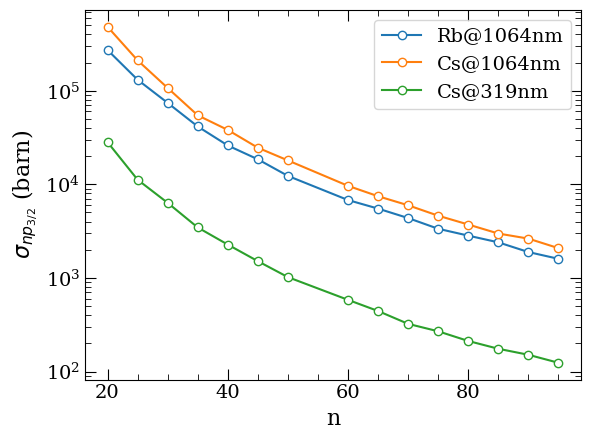

In [72]:
data = pd.read_csv('Crosssection.csv')
cols = [2,4, 6] 
labels=['Rb@1064nm', 'Cs@1064nm', 'Cs@319nm']
fig, ax = plt.subplots()
for col, label in zip(cols, labels):
    n = data.iloc[1:,0].values.astype(int)
    # print(data.iloc[0,col])
    sigma = data.iloc[1:,col].values
    # print(sigma)
    # print(data)
    
    ax.plot(n, sigma.astype(float), 'o-', markerfacecolor='white',label=label)
ax.legend(fontsize=14)
ax.set_yscale('log')
ax.set_xlabel('n', fontsize=16)
ax.set_ylabel('$\sigma_{np_{3/2}}$ (barn)', fontsize=16)
ax.tick_params(labelsize=14)
fig.savefig('PIcrosssection.pdf')

<h2>Debugging</h2>

281.7598289473684


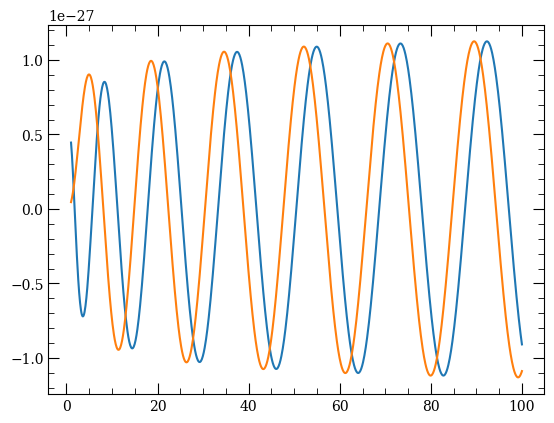

In [333]:
# def rbound(gamma,l,r):
#     a0/(gamma**2*(gamma(gamma+l+1)*gamma
MU: Dict[int, float] = {
    0: 4.049325,
    1: 3.590624,
    2: 2.464014,
    3: 0.031064,
}
# def r_bound(z,gamma,l):
#     return np.complex64((-1)**(1+l-np.around(gamma))*1/gamma/np.sqrt(gamma_f(gamma+l+1)*gamma_f(gamma-l))*\
#     np.exp(-z/gamma)*(2*z/gamma)**(l+1)*mp.hyperu(1+l-gamma,2*l+2,2*z/gamma))

n = 60
l = 1
wavelength = 1064 #nm
gamma = n- MU[l]
omega_photon = c/wavelength/1e-9*np.pi*2
print(omega_photon/np.pi/2*1e-12)
eta = -np.sqrt(1/(2*hbar*omega_photon/EH-1/gamma**2))
# print(gamma)
rmin = l*(l+1)/2
rs = np.linspace(rmin,100,1000)
# print(eta)

wave = [np.complex64(r_continum(r*a0,eta,0)) for r in rs]
wavep = [np.complex64(r_continum(r*a0,eta,2)) for r in rs]
# plt.plot(rs, [np.abs(r_bound(r*a0,gamma,l)) for r in rs])
plt.plot(rs, np.real(wave))
plt.plot(rs, np.real(wavep))
# print(mp.hyperu(1+l-gamma,2*l+2,100))

In [361]:
import numpy as np
from scipy.integrate import simpson
# rs = np.linspace(rmin,8000, 1000)
# u = np.array([r_bound(r, gamma, l) for r in rs], dtype=np.complex128)
# mask = np.isfinite(u) & np.isfinite(rs)
# rs2 = rs[mask]
# u2  = u[mask]

# norm = simpson(np.abs(u2)**2, x=rs2)
# print("Normalization Bound state integral ∫|u|^2 dr =", norm)

# rs = np.linspace(rmin, 8000, 1000)
# u = np.array([r_continum(r, gamma, l) for r in rs], dtype=np.complex128)
# mask = np.isfinite(u) & np.isfinite(rs)

# rs2 = rs[mask]
# u2  = u[mask]
# print(u2.shape)
# norm = simpson(np.abs(u2)**2, x=rs2)
# print("Normalization continuum state integral ∫|u|^2 dr =", norm)

mp.mp.dps = 1000  # increase precision if needed



def ptsigma(n, lr, jr, lc, wavelength, atom=cs):
    defect = atom.getQuantumDefect(n=n,l=lr,j=jr)
    gamma = n- defect
    omega_photon = c/wavelength/1e-9*np.pi*2
    # print(omega_photon/np.pi/2*1e-12)
    eta = -np.sqrt(1/(2*hbar*omega_photon/EH-1/gamma**2))
    print('gamma=', gamma, ', eta=', eta)
    rmin = l*(l+1)/2
    rmax = 10000
    
    def r_bound(r,gamma,l):
        return (-1)**(1+l-np.around(gamma))*1/gamma/mp.sqrt(gamma_f(gamma+l+1)*gamma_f(gamma-l))*\
        mp.exp(-r/gamma/a0)*(2*r/gamma/a0)**(l+1)*mp.hyperu(1+l-gamma,2*l+2,2*r/gamma/a0)

    def r_continum(r, eta,l):
        # p = k*r
        return mp.sqrt(abs(eta)*2/e**2/mp.pi)*(2**l)*mp.exp(-mp.pi*eta/2)*abs(mp.gamma(l+1+1j*eta))/mp.factorial(2*l+2)*\
        ((r/abs(eta)/a0)**(l+1))*mp.exp(-1j*r/abs(eta)/a0)*mp.hyper([l+1-1j*eta], [2*l+2], 2j*r/abs(eta)/a0)
        
    def bound_norm(gamma, l):
    # integrand for ∫ |R(r)|^2 r^2 dr
        f = lambda r: abs(r_bound(r, gamma, l))**2
        return mp.quad(f, [rmin*a0, mp.inf])
    
    Nb = bound_norm(gamma, lr)
    print("Bound norm =", Nb)

    def con_norm(eta, l):
    # integrand for ∫ |R(r)|^2 r^2 dr
        f = lambda r: abs(r_continum(r, eta, l))**2
        return mp.quad(f, [0, mp.inf])
        
    Nb = con_norm(eta, lc)
    print("con continum =", Nb)

    f = lambda r: r*r_bound(r,gamma,lr)*r_continum(r, eta, lc)
    return mp.quad(f, [rmin*a0, rmax*a0])
# eta = -1
rb = Rubidium()

cross = ptsigma(n=60, lr=1, jr=3/2, lc=2, wavelength=1064, atom=rb)
print('cross section=', cross/1e-28)
# u_norm = u / np.sqrt(norm)

gamma= 57.3582366337359 , eta= -3.4231211888083326
Bound norm = 0.99999748424951647865225303572182365294512400043835
Bound continum = 2.0410176809998231671792331103752977543762868382042e+387903652701074157571159222234203493838391796990896157
cross section= (1.9945336181719066074138025490073866378887556838101e+51 + 0.0000015298596003535498801398793840007398105093234368067j)


In [438]:
# import numpy as np
# from scipy.integrate import simpson
# rs = np.linspace(rmin,8000, 1000)
# u = np.array([r_bound(r, gamma, l) for r in rs], dtype=np.complex128)
# mask = np.isfinite(u) & np.isfinite(rs)
# rs2 = rs[mask]
# u2  = u[mask]

# norm = simpson(np.abs(u2)**2, x=rs2)
# print("Normalization Bound state integral ∫|u|^2 dr =", norm)

# rs = np.linspace(rmin, 8000, 1000)
# u = np.array([r_continum(r, gamma, l) for r in rs], dtype=np.complex128)
# mask = np.isfinite(u) & np.isfinite(rs)

# rs2 = rs[mask]
# u2  = u[mask]
# print(u2.shape)
# norm = simpson(np.abs(u2)**2, x=rs2)
# print("Normalization continuum state integral ∫|u|^2 dr =", norm)

mp.mp.dps = 100  # increase precision if needed
n = 20
lr = 1
jr =3/2
wavelength = 1064
defect = rb.getQuantumDefect(n=n,l=lr,j=jr)
gamma = n- defect
m = rb.mass
Ec = -EH/gamma**2+c*h/1064e-9
# print(m)
k = np.sqrt(Ec/hbar**2*2*m)
eta = -e**2*m*c/137/hbar/k
print(eta)
print(k)
# def r_continum(p, eta,l):
#     # p = k*r
#     return (2**l)*mp.exp(-mp.pi*eta/2)*abs(mp.gamma(l+1+1j*eta))/mp.factorial(2*l+1)*\
#     (p**(l+1))*mp.exp(-1j*p)*mp.hyper([l+1-1j*eta], [2*l+2], -2j*p)

omega_photon = c/wavelength/1e-9*np.pi*2
# print(omega_photon/np.pi/2*1e-12)
eta = np.sqrt(1/(2*hbar*omega_photon/EH-1/gamma**2))

def r_continum(r, eta,l):
    # p = k*r
    return mp.sqrt(abs(eta)*2/e**2/mp.pi)*(2**l)*mp.exp(-mp.pi*eta/2)*abs(mp.gamma(l+1+1j*eta))/mp.factorial(2*l+2)*\
    ((r/abs(eta)/a0)**(l+1))*mp.exp(-1j*r/abs(eta)/a0)*mp.hyper([l+1-1j*eta], [2*l+2], 2j*r/abs(eta)/a0)

    
def con_norm(eta, l):
# integrand for ∫ |R(r)|^2 r^2 dr
    f = lambda r: abs(r_continum(r, eta, l))**2
    return mp.quad(f, [0, 100])
    
Nb = con_norm(eta, 1)

print("Bound continum =", Nb)

-3.593129541839452e-35
2089766746013.1611


KeyboardInterrupt: 

In [440]:
1/gamma**2

0.0033191990393227457